In [2]:
%matplotlib inline

In [41]:
#######################
# Import dependencies #
#######################
import os
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [42]:
#######################################################
# Function to save image, ensures that the dir exists #
#######################################################
def save_chart(name: str):
    if os.path.exists("images/"):
        plt.savefig(f'images/{name}')
    else:
        os.mkdir("images/")
        save_chart(name)

In [43]:
####################
# Study data files #
####################
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [44]:
#############################################
# Read the mouse data and the study results #
#############################################
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [45]:
##########################################
# Combine the data into a single dataset #
##########################################
raw_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [46]:
######################################
# Display the data table for preview #
######################################
raw_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
##########################
# Checking the # of mice #
##########################
mice_count = len(raw_data["Mouse ID"].unique())
mice_count

249

In [48]:
#####################################################################################
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. #
#####################################################################################
grouped = raw_data.copy().groupby(["Mouse ID", "Timepoint"]).agg({"Mouse ID": "count"}).sort_values("Timepoint", ascending=False)
grouped

,,Mouse ID
Mouse ID,Timepoint,
l897,45,1
j913,45,1
g791,45,1
h246,45,1
i177,45,1
...,...,...
t994,0,1
g867,0,1
t724,0,1


In [49]:
#######################################################################
# Create a clean DataFrame by dropping the duplicate mouse by its ID. #
#######################################################################
clean_data = raw_data.copy()
clean_data = clean_data.drop(clean_data[clean_data["Mouse ID"] == "g989"].index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
#######################################################
# Checking the number of mice in the clean DataFrame. #
#######################################################
mice_count = len(clean_data["Mouse ID"].unique())
mice_count

248

In [51]:
####################################################################
# Generate a summary statistics table of mean, median, variance,   #
# standard deviation, and SEM of the tumor volume for each regimen #
#####################################################################
tum_sum_df = pd.DataFrame({
    "Mean": [clean_data["Tumor Volume (mm3)"].mean()],
    "Median": [clean_data["Tumor Volume (mm3)"].median()],
    "Variance": [clean_data["Tumor Volume (mm3)"].var()],
    "Standard Deviation": [clean_data["Tumor Volume (mm3)"].std()],
    "SEM": [clean_data["Tumor Volume (mm3)"].sem()]
})
tum_sum_df

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [52]:
###########################################################################################################
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: #
# mean, median, variance, standard deviation, and SEM of the tumor volume.                                #
# Assemble the resulting series into a single summary dataframe.                                          #
###########################################################################################################
regimen_tum_sum_df = pd.DataFrame({
    "Mean": clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    "Median": clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    "Variance": clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    "Standard Deviation": clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    "SEM": clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
})
regimen_tum_sum_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
############################################################################################
# Generate a summary statistics table of mean,                                             #
#       median, variance, standard deviation, and SEM of the tumor volume for each regimen #
# Using the aggregation method, produce the same summary statistics in a single line       #
############################################################################################
agg_df = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

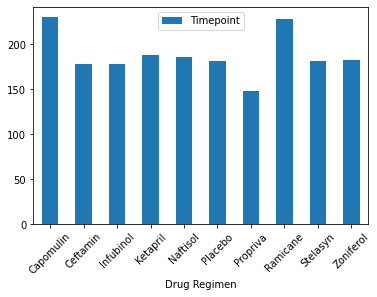

In [54]:
######################################################################################################################
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. #
######################################################################################################################
timepoint_count = clean_data.groupby(["Drug Regimen"]).agg({"Timepoint": "count"})
timepoint_count.plot(kind="bar", rot=45)
save_chart("Pandas_Regimen_vs_Timepoint")
plt.show()

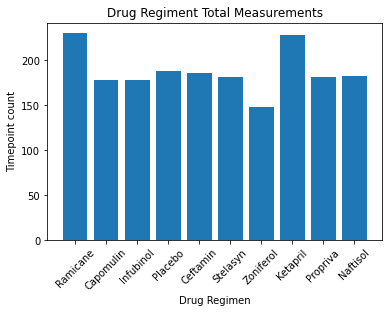

In [55]:
######################################################################################################################
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot. #
######################################################################################################################
x_axis = clean_data["Drug Regimen"].unique()
plt.bar(x_axis, timepoint_count["Timepoint"])
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Timepoint count")
plt.title("Drug Regiment Total Measurements")
save_chart("MatPlotLib_Regimen_vs_Timepoint")
plt.show()

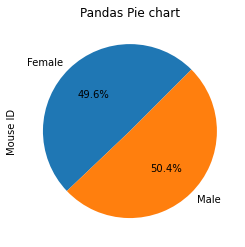

In [56]:
########################################################################################
# Generate a pie plot showing the distribution of female versus male mice using Pandas #
########################################################################################
genders = clean_data.groupby("Sex").nunique()["Mouse ID"]
genders.plot(kind="pie", autopct='%1.1f%%', startangle=45)
plt.title("Pandas Pie chart")
save_chart("Pandas_Genders_Pie")
plt.show()

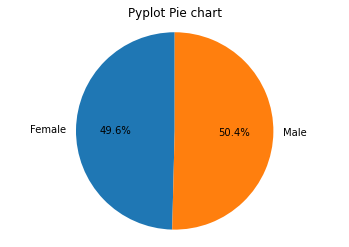

In [57]:
########################################################################################
# Generate a pie plot showing the distribution of female versus male mice using pyplot #
########################################################################################
labels = ["Female", "Male"]
fig1, ax1 = plt.subplots()
ax1.pie(genders, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Pyplot Pie chart")
save_chart("Plt_Genders_Pie")
plt.show()

In [19]:
#########################################################################################
# Calculate the final tumor volume of each mouse across four of the treatment regimens: #
# Capomulin, Ramicane, Infubinol, and Ceftamin                                          #
#########################################################################################
Capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Ramaicane = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Infubinol = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})
Ceftamin = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "last"})

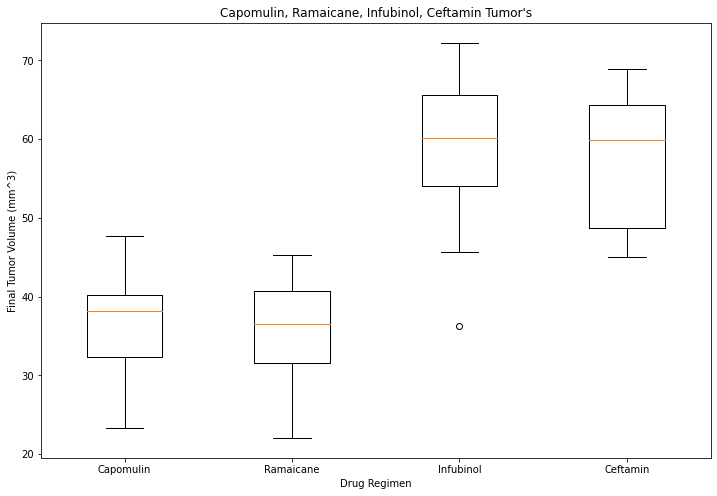

In [58]:
################################################################################################
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest #
################################################################################################
fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot([Capomulin["Tumor Volume (mm3)"],
            Ramaicane["Tumor Volume (mm3)"],
            Infubinol["Tumor Volume (mm3)"],
            Ceftamin["Tumor Volume (mm3)"]])
ax.set_xticklabels(["Capomulin", "Ramaicane", "Infubinol", "Ceftamin"])
plt.title("Capomulin, Ramaicane, Infubinol, Ceftamin Tumor's")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm^3)")
save_chart("Top_4_BoxPlot")
plt.show()

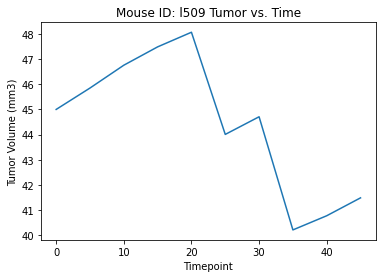

In [59]:
##########################################################################################
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin #
##########################################################################################
l509_tum = clean_data.loc[clean_data["Mouse ID"] == "l509"]["Tumor Volume (mm3)"]
l509_time = clean_data.loc[clean_data["Mouse ID"] == "l509"]["Timepoint"]
plt.plot(l509_time, l509_tum)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID: l509 Tumor vs. Time")
save_chart("L509_Tumor_vs_Time")
plt.show()

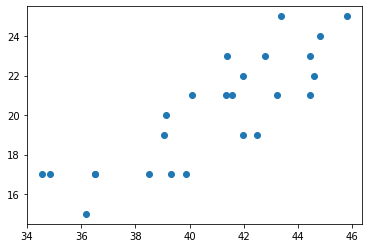

In [22]:
##############################################################################################
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen #
##############################################################################################
Capomulin_avg = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean"})
Capomulin_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]\
    .groupby("Mouse ID").agg({"Weight (g)": "mean"})
plt.scatter(Capomulin_avg, Capomulin_weight)
save_chart("Tumor_vs_Weight")
plt.show()

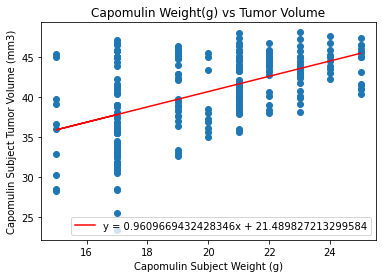

In [60]:
#######################################################################
# Calculate the correlation coefficient and linear regression model   #
# for mouse weight and average tumor volume for the Capomulin regimen #
#######################################################################
result = st.linregress(
    clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
)
plt.scatter(
    clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
)
formula = result.slope * clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Weight (g)"] + result.intercept
plt.plot(
    clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Weight (g)"],
    formula,
    color='red',
    label=f'y = {result.slope}x + {result.intercept}'
)
plt.xlabel("Capomulin Subject Weight (g)")
plt.ylabel("Capomulin Subject Tumor Volume (mm3)")
plt.title("Capomulin Weight(g) vs Tumor Volume")
plt.legend(loc='lower right')
save_chart("Weight_vs_TumorVol")
plt.show()